# Lab 02: Training with epochs -- exercise

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # find automatically the path of the folder containing "file_name" :
    file_name = 'epoch_exercise.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    #path_to_file = '/content/gdrive/My Drive/CS5242_2021_codes/codes/labs_lecture05/lab02_epoch'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [3]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

train_data=torch.load(data_path+'mnist/train_data.pt')
train_label=torch.load(data_path+'mnist/train_label.pt')
test_data=torch.load(data_path+'mnist/test_data.pt')

### Make a ONE layer net class. 

In [4]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [5]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=50

# You only have stuff to do in this cell

### Do 15 passes through the training set

In [8]:
for epoch in range(15): # COMPLETE
    
    # COMPLETE
    shuffled_indices = torch.randperm(60000)
 
    for count in range(0, 60000, bs): # COMPLETE
    
        optimizer.zero_grad()
        
        indices = shuffled_indices[count:count+bs] # COMPLETE
        minibatch_data = train_data[indices] # COMPLETE
        minibatch_label = train_label[indices] # COMPLETE

        inputs = minibatch_data.view(bs,784)
        
        inputs.requires_grad_()

        scores=net( inputs ) 

        loss = criterion( scores , minibatch_label) 
 
        loss.backward()

        optimizer.step()

### Choose image at random from the test set and see how good/bad are the predictions

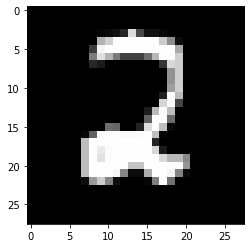

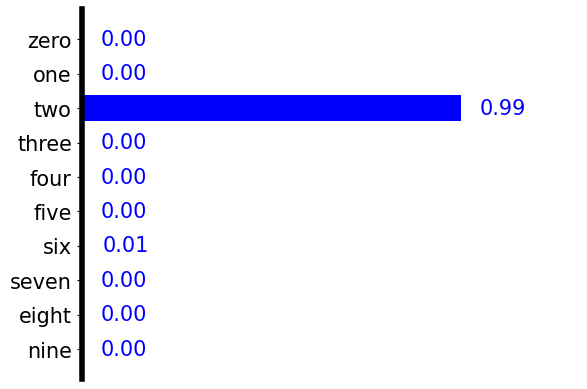

In [9]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= torch.softmax(scores, dim=1)
utils.show_prob_mnist(probs)